<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/Belt_Exam_drug200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/drug200.csv"
df = pd.read_csv(filename)

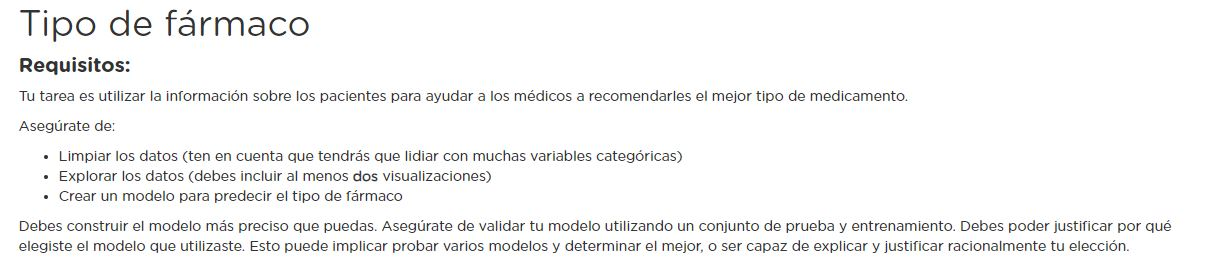

1.Exploración y depuración de datos

In [112]:
# A continuacion revisaremos aquellos datos nulos para ver la integridad de la informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


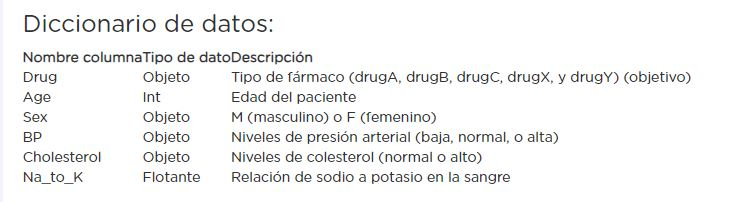

In [113]:
# Existe una consistencia completa entre el diccionario de datos y el dataframe incorporado, lo que permite inicialmente comenzar a confiar en dicha base de datos.

In [114]:
# Revisaremos los primero diez datos para dimensionar la magnitud de la info
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [115]:
# Tal como se vio en elementos anteriores, no existe ningun dato nulo, sin embargo ahora evaluaremos si existe algun dato duplicado
duplicados = df.duplicated()
duplicados.sum()

0

Consideraciones Iniciales:

    1. **Variables Categoricas**: Las variables sexo, BP, Cholesterol & Drug se visualizan como variables categoricas, sin embargo y para efectos de mejorar nuestro estudio de las mismas, seran reinterpretadas como variables cuantitativas a traves de un diccionario individual para cada una.

    2. Target: el objetivo principal de nuestro request es poder predecir nuestra variable objetivo, en este caso; "Drug", la cual es una variable categoria, lo que a priori nos permitira trabajar con nuestros conocidos modelos de aprendizaje automatico para valores categoricos (KNN, Random forest, etc).

In [116]:
#Previo a realizar nuestra transformacion de variables categoricas a numericas, revisaremos nuestra estadistica descriptiva
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


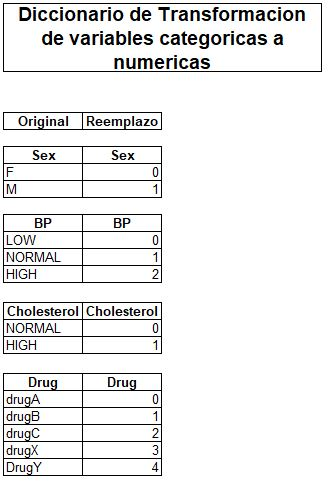

In [117]:
#A continuacion comenzaremos a realizar nuestra transformacion de datos desde variables categoricas a numericas, lo que nos permitira tener un mejor entidimiento de cada una tanto de manera individual, como conjunta (como se relacionan entre si)

df2=df
#Sex
df2['Sex'] = df2['Sex'].replace("F",0)
df2['Sex'] = df2['Sex'].replace("M",1)
#BP
df2['BP'] = df2['BP'].replace("LOW",0)
df2['BP'] = df2['BP'].replace("NORMAL",1)
df2['BP'] = df2['BP'].replace("HIGH",2)

#Cholesterol
df2['Cholesterol'] = df2['Cholesterol'].replace("NORMAL",0)
df2['Cholesterol'] = df2['Cholesterol'].replace("HIGH",1)

#Drug
df2['Drug'] = df2['Drug'].replace("drugA",0)
df2['Drug'] = df2['Drug'].replace("drugB",1)
df2['Drug'] = df2['Drug'].replace("drugC",2)
df2['Drug'] = df2['Drug'].replace("drugX",3)
df2['Drug'] = df2['Drug'].replace("DrugY",4)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [118]:
#Habiendo ya realizado nuestra respectiva transformacion con base al diccionario previamente expuesto, veremos como se ve representada nuestra nueva estadistica descriptiva
df2.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,1.065000,0.515000,16.084485,2.870000
std,16.544315,0.500854,0.839224,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,1.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [119]:
#Solo a objetos poder revisar la data en toda su detalle realizaremos una revision directa en excel
df2.to_excel("drug200e.xlsx", index=False)

2. Visualización y navegacion de dataframe

2.1 Correlacion entre variables

A continuacion confeccionaremos una matriz de correlacion con el objeto de obtener informacion relevante sobre las distintas variables y comenzar a definir ciertas premisas e hipotesis, para posterior a ello someterlas a ciertas pruebas y extraer conclusiones sobre las misma.

In [120]:
#A continuacion analizamos la correlacion entra las variables cuantitativas (habiendo realizado ya nuestra transformacion).
import pandas as pd
corr_df = df2.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,-0.120918,0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.044952,0.008811,-0.125008,-0.098573
BP,-0.120918,-0.044952,1.000000,-0.032208,0.036871,-0.328665
Cholesterol,0.068234,0.008811,-0.032208,1.000000,-0.010000,-0.055629
Na_to_K,-0.063119,-0.125008,0.036871,-0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,-0.328665,-0.055629,0.589120,1.000000


2.2 Principales Premisas, hipotesis y nivel de relacion entre las variables.

A partir de nuestra matriz de correlacion ya podemos comenzar a establecer ciertas relaciones relevantes:

  1. Tipo de Droga y Relacion de sodio y potasio en la sangre: existe una estrecha relacion entre ambas, sin embargo puede estar siendo afectada por nuestra transformacion de variable a categorica a numerica, por lo cual revisaremos visualmente dicho efecto.

  2.  Niveles de presion arterial y el tipo de droga, al igual que en el punto anterior, es posible asumir que existe una relacion relevante entre estas 2 variables.

  3. A priori elementos como la edad, el sexo y el nivel de colesterol, parece que tuviera una alta ingerencia en el tipo de droga a suministrar, sin embargo evaluaremos la relacion entre ellas, para evaluar si de manera conjunta pudiesen afectar.

2.3 Evaluacion de Premisas (Visualizacion)

<function matplotlib.pyplot.show(*args, **kw)>

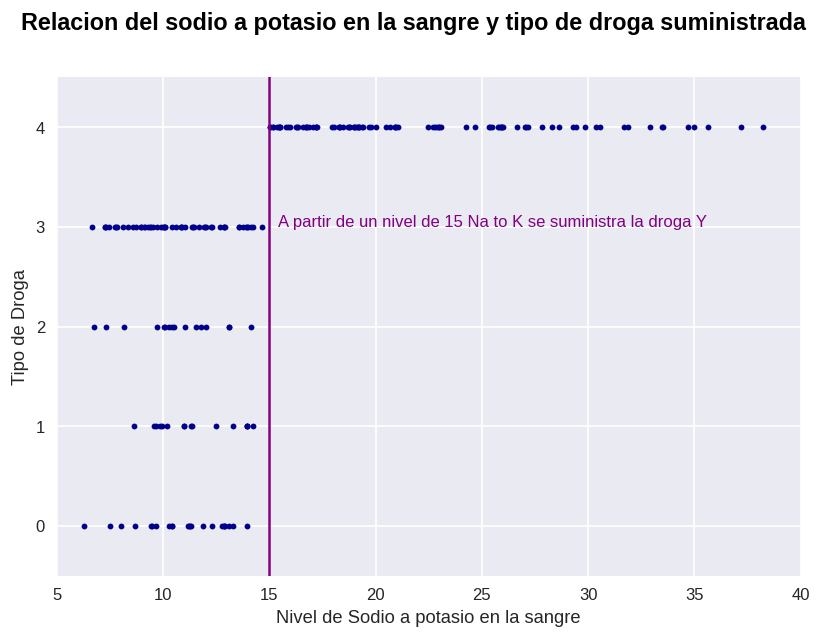

In [169]:
import matplotlib.pyplot as plt

plt.figure(dpi = 120)
plt.suptitle("Relacion del sodio a potasio en la sangre y tipo de droga suministrada ", fontsize=14, fontweight="bold",color = "black" )

plt.plot(df2["Na_to_K"],df2["Drug"],'.', color = "darkblue",)
plt.xticks(rotation=0, size=10)
plt.xlabel("Nivel de Sodio a potasio en la sangre")
plt.ylabel("Tipo de Droga")
plt.axvline(x=15, ymin=-0.5, ymax=5, color="purple",linewidth=1.5)
plt.annotate('A partir de un nivel de 15 Na to K se suministra la droga Y ', xy=(15,3), xytext=(15.4,3), color="purple")
plt.axis([5,40,-0.5,4.5])
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

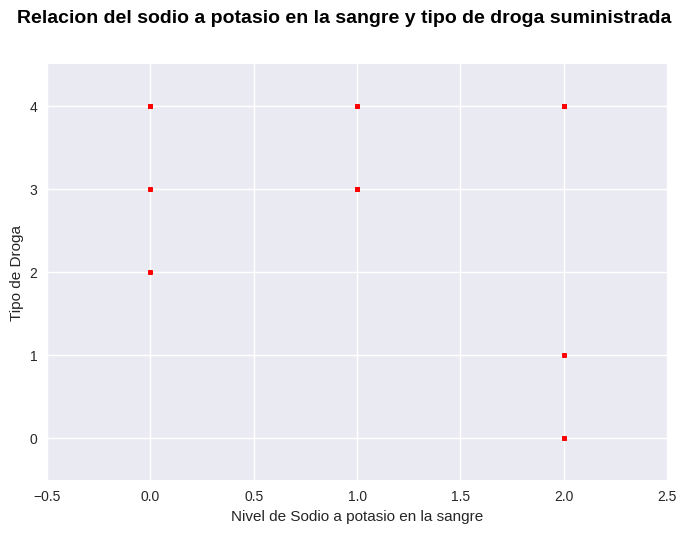

In [245]:
import matplotlib.pyplot as plt

plt.figure(dpi = 100)
plt.suptitle("Relacion del sodio a potasio en la sangre y tipo de droga suministrada ", fontsize=14, fontweight="bold",color = "black" )

plt.plot(df2["BP"],df2["Drug"],'.', color = "red",)
plt.xticks(rotation=0, size=10)
plt.xlabel("Nivel de Sodio a potasio en la sangre")
plt.ylabel("Tipo de Droga")
plt.axis([-0.5,2.5,-0.5,4.5])
plt.legend()

plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


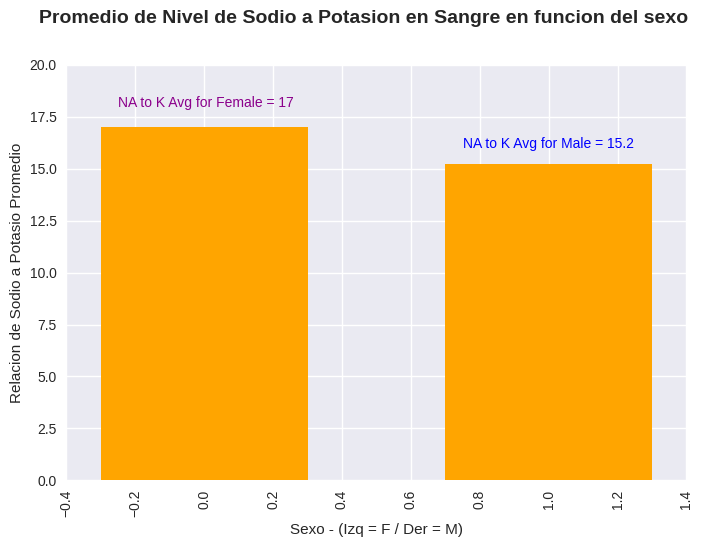

In [228]:
df3=df2
df3=df.groupby(['Sex'])[['Na_to_K']].mean().reset_index().sort_values(by="Sex",ascending =True)

import matplotlib.pyplot as plt
from numpy import arange
from numpy.random import randint

plt.style.use('seaborn')

fig1 = plt.figure(dpi=100)
fig1.suptitle("Promedio de Nivel de Sodio a Potasion en Sangre en funcion del sexo ", fontsize=14, fontweight="bold", )

plt.axis([-0.4,1.4,0,20])

ax1 = fig1.add_subplot(111)
sep = 0.6
ax1.bar(df3["Sex"],df3["Na_to_K"], sep, color='orange')

plt.annotate('NA to K Avg for Female = 17', xy=(-0.3,18), xytext=(-0.25,18), color="darkmagenta")
plt.annotate('NA to K Avg for Male = 15.2', xy=(0.2,18), xytext=(0.75,16), color="blue")


plt.xticks(rotation=90)
plt.xlabel("Sexo - (Izq = F / Der = M)")
plt.ylabel("Relacion de Sodio a Potasio Promedio")

plt.show()

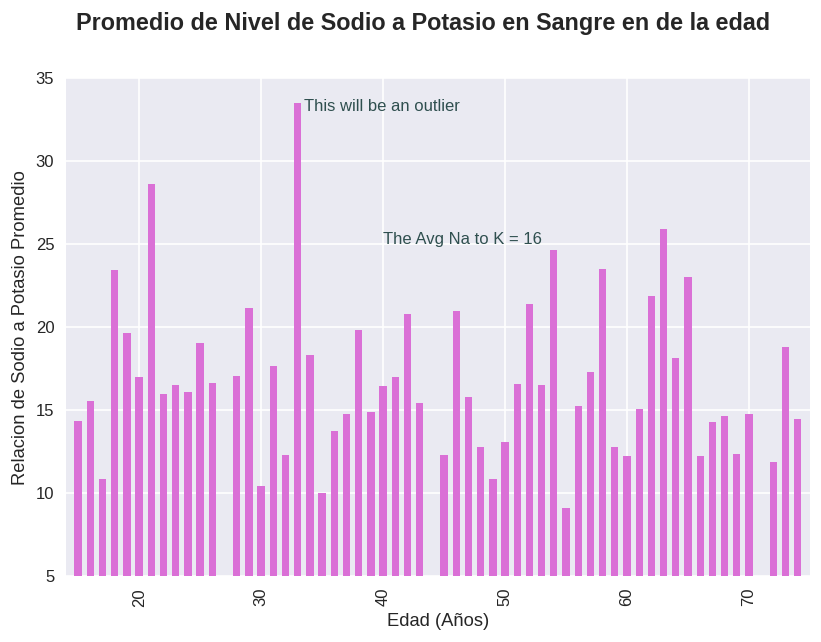

In [267]:
df4=df2
df4=df.groupby(['Age'])[['Na_to_K']].mean().reset_index().sort_values(by="Age",ascending =True)

import matplotlib.pyplot as plt
from numpy import arange
from numpy.random import randint

plt.style.use('seaborn')

fig1 = plt.figure(dpi=120)
fig1.suptitle("Promedio de Nivel de Sodio a Potasio en Sangre en de la edad ", fontsize=14, fontweight="bold", )

ax1 = fig1.add_subplot(111)
sep = 0.6
ax1.bar(df4["Age"],df4["Na_to_K"], sep, color='orchid')
plt.axis([14,75,5,35])

plt.annotate('The Avg Na to K = 16', xy=(40,25), xytext=(40,25), color="darkslategray")
plt.annotate('This will be an outlier', xy=(35,35), xytext=(33.5,33), color="darkslategray")

plt.xticks(rotation=90)
plt.xlabel("Edad (Años)")
plt.ylabel("Relacion de Sodio a Potasio Promedio")

plt.show()

In [262]:
df.groupby(['Drug'])[['Drug']].count()

,Drug
Drug,
0,23
1,16
2,16
3,54
4,91


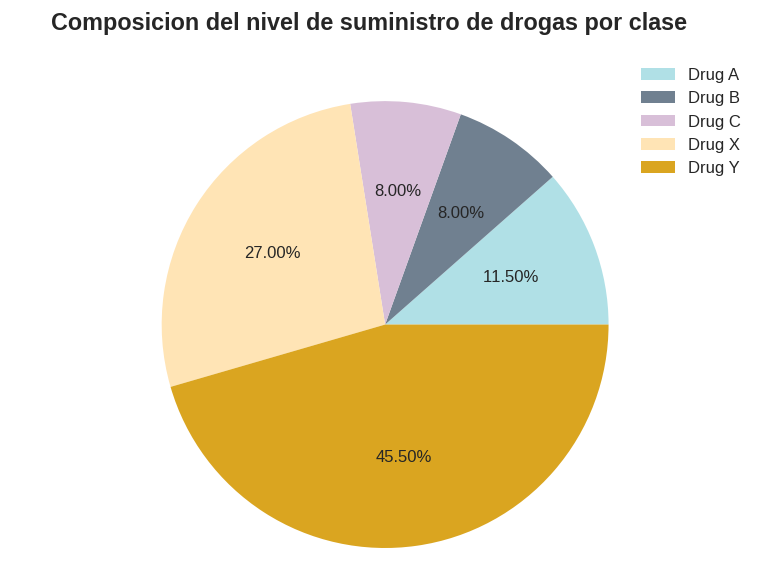

In [266]:
import matplotlib.pyplot as plt


fig1 = plt.figure(dpi=120)
ax1 = fig1.add_subplot(1,1,1) 
fig1.suptitle("Composicion del nivel de suministro de drogas por clase ", fontsize=14, fontweight="bold", )
size = [23, 16,16,54,91]
etiquetas = ["Drug A","Drug B","Drug C","Drug X","Drug Y"]
colores=["powderblue","slategrey","thistle","moccasin","goldenrod"]

ax1.pie(size, autopct="%.2f%%", shadow = False, startangle=0, colors=colores)
ax1.legend(bbox_to_anchor=(1, 1.05), loc='upper right', labels= etiquetas)

ax1.axis("equal")

plt.show()

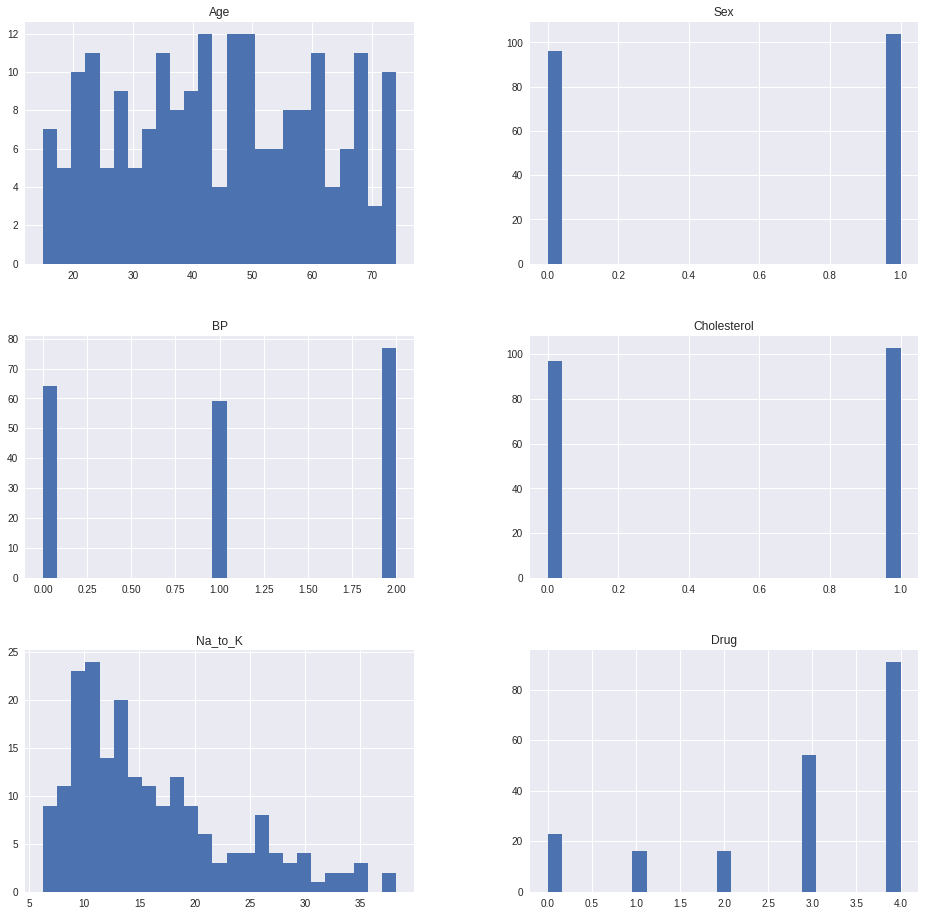

In [270]:
df2.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=0);

3. Creacion y Optimizacion de Modelo Predictivo

A) KNN

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb


%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.exceptions import NotFittedError
from sklearn.metrics import roc_auc_score, plot_roc_curve

Preparamos el dataset

In [278]:
# Las variables objeto de prediccion fueron elegidas en funcion de su correlacion con la variable a predecir.
X = df2[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = df2['Drug'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo

In [279]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 90

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train,y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.51
Accuracy of K-NN classifier on test set: 0.58


Resultados obtenidos

In [280]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  0  0  0  6]
 [ 0  0  0  1  5]
 [ 0  0  0  1  3]
 [ 0  0  0  4  8]
 [ 0  0  0  1 31]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.57      0.33      0.42        12
           4       0.58      0.97      0.73        32

    accuracy                           0.58        60
   macro avg       0.23      0.26      0.23        60
weighted avg       0.43      0.58      0.47        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


B) Arbol de Decision

In [284]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [294]:
X = df2[['Age','Sex','BP','Cholesterol','Na_to_K']].values
y = df2['Drug'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)
# Visualizando árbol de decisión
# Nueva instancia
# CALCULAMOS LAS Probabilidades por cada clase
print(tree_clf.predict_proba(X_test))
# Clase predicha
pred=tree_clf.predict(X_test)
print("Esta instancia pertenece a la clase",tree_clf.predict(X_test))

[[0.         0.         0.         0.         1.        ]
 [0.         0.         0.22222222 0.77777778 0.        ]
 [0.         0.         0.22222222 0.77777778 0.        ]
 [0.         0.         0.22222222 0.77777778 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.22222222 0.77777778 0.        ]
 [0.         0.         0.22222222 0.77777778 0.        ]
 [0.         0.         0.22222222 0.77777778 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.22222222 0.77777778 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.62962963 0.37037037 0.         0.         0.        ]
 [0.62962963 0.37037037 0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0

In [292]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 5  1  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 32]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        32

    accuracy                           0.98        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.99      0.98      0.98        60



C) Random Forests

In [302]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=3)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

pred = rndf_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

rndf_clf.score(X_test, y_test)

[[ 6  0  0  0  0]
 [ 2  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        32

    accuracy                           0.97        60
   macro avg       0.95      0.93      0.93        60
weighted avg       0.97      0.97      0.97        60



0.9666666666666667

D) Regresion Logistica

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Entrenamiento regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [307]:
y_pred = log_reg.predict(X_test)

pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

log_reg.score(X_test, y_test)

[[ 3  3  0  0  0]
 [ 0  4  0  1  1]
 [ 0  0  3  1  0]
 [ 0  0  0 10  2]
 [ 0  0  1  1 30]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.57      0.67      0.62         6
           2       0.75      0.75      0.75         4
           3       0.77      0.83      0.80        12
           4       0.91      0.94      0.92        32

    accuracy                           0.83        60
   macro avg       0.80      0.74      0.75        60
weighted avg       0.85      0.83      0.83        60



0.8333333333333334

4. Conclusiones e Interpretaciones Finales

  1. **Na_to_K vs Drug:** a traves del proceso de visualizacion de las distintas variables que componen nuestro DF, fuimos capaces de validar que existe una estrecha relacion entre Na_to_k (Sodio a Potasio en Sangre) con respecto a la droga suministrada, sobre todo para la "droga Y" que a contar del valor Na_to_k igual o superior a 15 no existia ningun otro tipo de droga posible de suministrar.

  2. **Na_to_K Evaluados en Funcion de Edad y Sexo**: fue posible visualizar que en general existia un comportamiento bastante normal de esta variable en funcion del sexo (las mujeres tenian un valor promedio superior por 1,8 puntos por sobre los hombres), por otra parte en relacion a la edad, la mayor parte del universo se encontraba cercano al promedio de 16, el cual sin embargo en varios casos superaba este nivel, principalmente para los jovenes de 18 y 21 años, asi como tambien para adultos ded 42,46,52 y para los mayores de 57 años.

  3. **Principales Relaciones entre variables**: Sin lugar a duda la variable clave para poder definir que tipo de droga se debe suministrar fue Na_to_K, sin embargo tambien debemos considerar que el nivel de presion arterial tenia una relacion inversa con respecto al tipo de droga a suministrar, es decir era altamente probable que si tuvieras una presion alta, se debia suministrar una droga tipo 4 = Droga Y, y finalmente el sexo tenia un menor nivel de relacion con respecto al tipo de droga a suministrar, lo cual es algo relativamente logico, debido a que nuestras funciones corporales son similares, asi como tambien como nuestro sistema enfrenta los distintos sintomas a los que podamos estar expuestos.

  4. **Seleccion del Modelo y Justificacion**: tal como se puede apreciar en cada una de las matriz de confusion para esta modelo de supervision automatico de variables categoricas, los niveles de precision fueron de la siguiente forma (descendente):

  A) KNN --> 58%
  B) Arbol de Decision --> 98%
  C) Random Forest --> 97%
  D) Regresion Logistica --> 83%

  Màs alla de los evidentes resultados, donde se evidencia una superioridad en los niveles de precision y prediccion para los modelos de Random Forest y Arbol de decision (modelos con una premisa bastante similar) considero que su performance tiene una relacion directa con el tipo de DF con el cual estamos trabajando, este ultimo tiene la particularidad que otorga y/o asigna una determinada droga en funcion de los distintos elementos que ya hemos expuesto (siendo principalmente en funcion de Na_to_k, nivel de presion arterial y el sexo) y a su vez su capacidad para analizar N veces los distintos rasgos y como se relacionan con la variable target, permitiendo depurar el modelo las veces que sea necesario (Gini Impurity), esto calza perfecto considerando que una droga es suministrada en la medida que cumpla con un conjunto de sintomas (Presion Arterial, Nivel de Colesterol, Sodio a Potasio en Sangre) asi como otros rasgos (Edad & Sexo)

  5. **Transformacion de Variables Categoricas**: finalmente quiero destacar que el hecho de transformar variables categoricas a numericas reviste un grado de complejidad adicional dentro de un DF, sin embargo al mismo tiempo aporta mucho al modelo lineal, permitiendo obtener mayor nivel de informacion.